In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
import shutil
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
base_dir = r"Directorio donde se encuentran las carpetas"
os.listdir(base_dir)

['test', 'train', 'val']

In [3]:
train_path = base_dir + '/train/'
test_path = base_dir + '/test/'
validation_path = base_dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/train/
test path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/test/
validation path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\LGG_HGG\train_test_val/val/


In [51]:
os.listdir(test_path)

['HGG', 'LGG']

In [4]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [5]:
image_generator.flow_from_directory(train_path)

Found 660 images belonging to 2 classes.


In [54]:
image_generator.flow_from_directory(test_path)

Found 223 images belonging to 2 classes.


In [55]:
image_generator.flow_from_directory(validation_path)

Found 219 images belonging to 2 classes.


In [10]:
## Modelo EfficientNetB1

In [6]:
Eff_model = EfficientNetB1(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 2
                )

for layer in Eff_model.layers:
    layer.trainable = False

In [7]:
model_class_1 = Sequential([
    Eff_model,
    Dense(2560,activation='relu'),
    BatchNormalization(),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')
])

In [8]:
model_class_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 dense (Dense)               (None, 2560)              3279360   
                                                                 
 batch_normalization (BatchN  (None, 2560)             10240     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1024)              1

In [9]:
model_class_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04) ,loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [10]:
batch_size = 32

In [11]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 660 images belonging to 2 classes.


In [12]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 219 images belonging to 2 classes.


In [13]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary',
                                                            shuffle = False)

Found 223 images belonging to 2 classes.


In [14]:
history = model_class_1.fit(train_image_generator, validation_data=validation_image_generator, epochs=60)

Epoch 1/60
21/21 [==============================] - 35s 1s/step - loss: 0.7730 - accuracy: 0.6000 - val_loss: 1.4766 - val_accuracy: 0.6849
Epoch 2/60
21/21 [==============================] - 31s 1s/step - loss: 0.5132 - accuracy: 0.7652 - val_loss: 0.6211 - val_accuracy: 0.7397
Epoch 3/60
21/21 [==============================] - 39s 2s/step - loss: 0.4298 - accuracy: 0.8167 - val_loss: 0.5650 - val_accuracy: 0.7260
Epoch 4/60
21/21 [==============================] - 34s 2s/step - loss: 0.3788 - accuracy: 0.8318 - val_loss: 0.5325 - val_accuracy: 0.7397
Epoch 5/60
21/21 [==============================] - 33s 2s/step - loss: 0.3662 - accuracy: 0.8303 - val_loss: 0.5165 - val_accuracy: 0.7443
Epoch 6/60
21/21 [==============================] - 36s 2s/step - loss: 0.3282 - accuracy: 0.8727 - val_loss: 0.8093 - val_accuracy: 0.7169
Epoch 7/60
21/21 [==============================] - 41s 2s/step - loss: 0.2718 - accuracy: 0.8712 - val_loss: 0.6319 - val_accuracy: 0.7671
Epoch 8/60
21/21 [==

In [36]:
y_pred = model.predict(test_image_generator)
y_pred = np.argmax(y_pred, axis=1)

19/19 [==============================] - 55s 3s/step


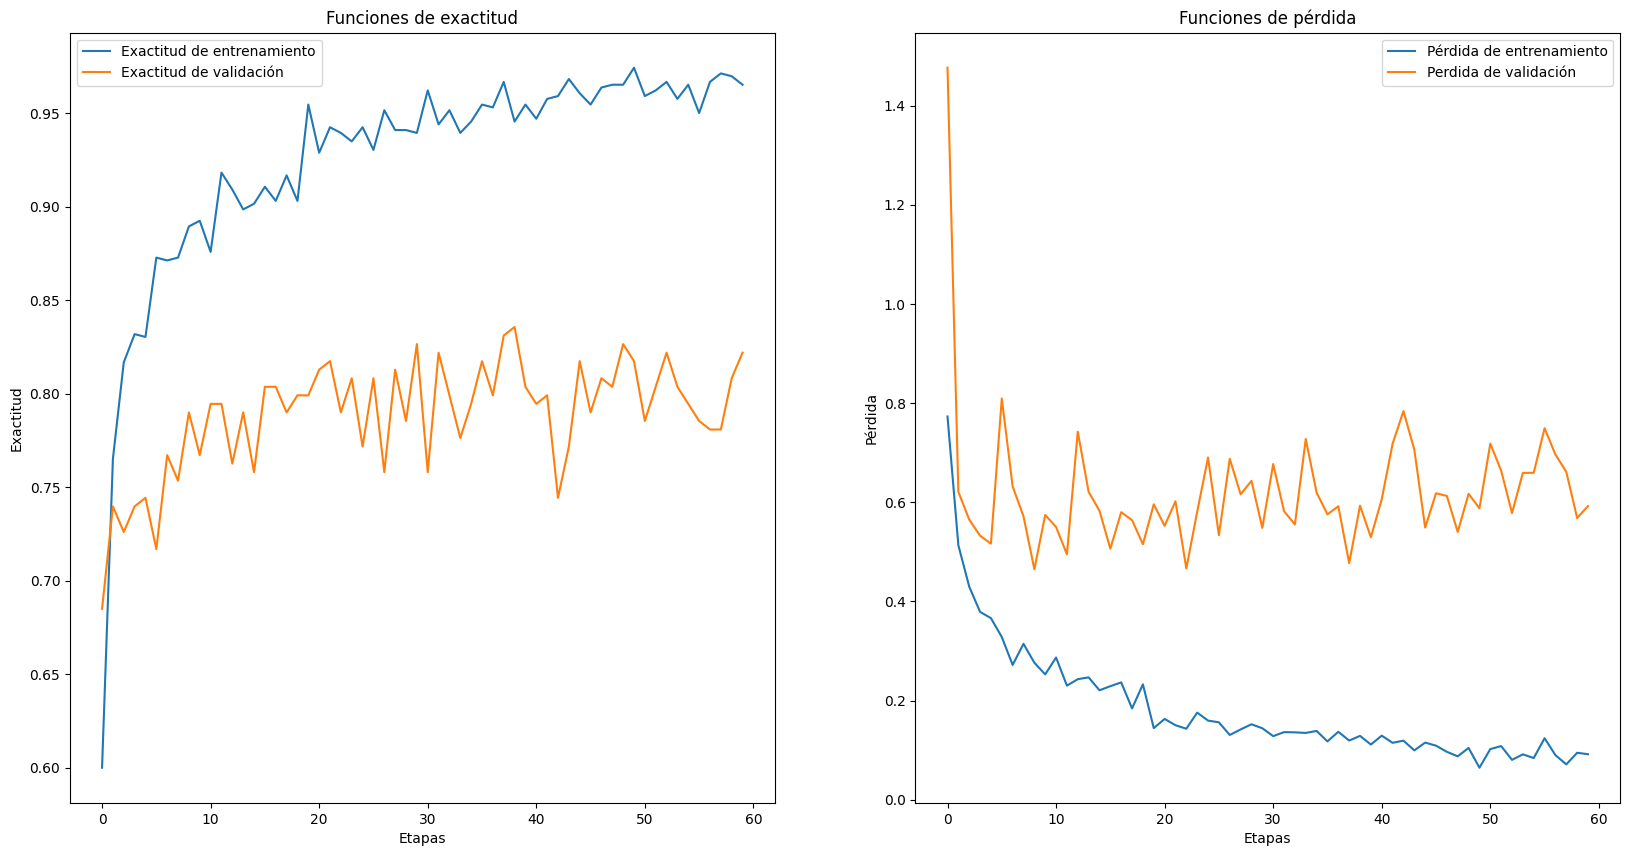

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Exactitud de entrenamiento')
ax[0].plot(val_acc, label = 'Exactitud de validación')
ax[0].set_xlabel('Etapas')
ax[0].set_ylabel('Exactitud')
ax[0].set_title('Funciones de exactitud')
ax[0].legend()


ax[1].plot(loss, label = 'Pérdida de entrenamiento')
ax[1].plot(val_loss, label = 'Perdida de validación')
ax[1].set_xlabel('Etapas')
ax[1].set_ylabel('Pérdida')
ax[1].set_title('Funciones de pérdida')
ax[1].legend()

In [21]:
!python --version


Python 3.10.13


In [17]:
# Predicción sobre los datos de prueba
y_pred_probs = model_class_1.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

# Convertir probabilidades en clases predichas (índices)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Extraer las etiquetas reales desde el generador
y_true = test_image_generator.classes
print(y_true)

7/7 [==============================] - 5s 566ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [36]:
print(y_pred_probs_1.shape)

(394, 4)


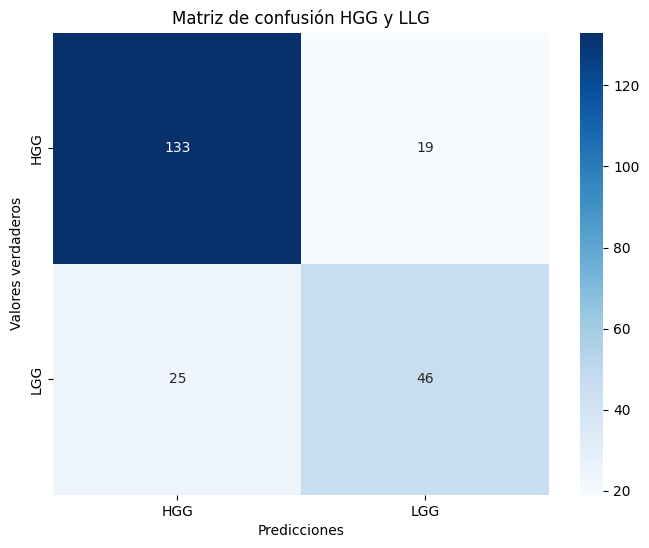

              precision    recall  f1-score   support

         HGG       0.84      0.88      0.86       152
         LGG       0.71      0.65      0.68        71

    accuracy                           0.80       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["HGG", "LGG"], yticklabels=["HGG", "LGG"])
plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.title("Matriz de confusión HGG y LLG")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred, target_names=["HGG", "LGG"])
print(report)


metricas para el modelo con Lr = 0.0001

Para el problema de clasificación preferimos evitar en la medida de lo posible la tas de falsos positivos, ya que es prioritario clasificar como tumor de alto grado los que son de alto grado y no clasificar como de bajo grado uno que ya es de alto grado (Falso Positivo).

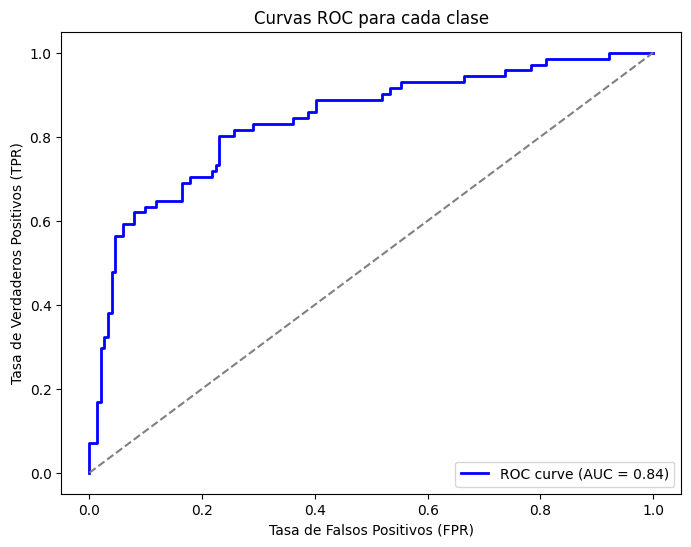

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC para la clase positiva
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])  # Usamos la columna de la clase 1
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()